In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] = [15,10]
sns.set_style('darkgrid')

In [2]:
header_df = None
%run nem_extract.py --save_tx_hashes --save_subcache_merkle_roots

processing block file: ./data/00035/00700.dat: 100%|██████████| 3508/3508 [00:50<00:00, 69.11it/s] 
processing statement file: ./data/00000/03400.stmt:   1%|          | 21/3508 [00:00<00:17, 203.42it/s]

block data extraction complete!



processing statement file: ./data/00035/00700.stmt: 100%|██████████| 3508/3508 [00:25<00:00, 139.66it/s]


statement data extraction complete!

block data written to ./block_data.pkl
header data written to ./block_header_df.pkl
statement data written to ./stmt_data.pkl
exiting . . .


In [3]:
if header_df is None:
    header_df = pd.read_pickle('./header_data.pkl')

In [4]:
header_df = header_df.reset_index().set_index('height')
header_df['delegated'] = header_df['beneficiary_address'] == header_df['harvester']
header_df['inflation'] = np.nan
header_df['inflation'].loc[5670] = 191997042
header_df['inflation'].loc[172799] = 183764522
header_df['inflation'] = header_df['inflation'].ffill().fillna(0.0)
header_df = header_df.reset_index().set_index('dateTime')
#header_df[['height', 'size', 'difficulty', 'beneficiary_address', 'fee_multiplier', 'harvester', 'tx_count', 'total_fee', 'inflation', 'delegated']].to_csv('header_analysis_data.csv')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [5]:
header_df

,height,size,reserved_1,signature,signer_public_key,reserved_2,version,network,type,timestamp,...,receipts_hash,state_hash,beneficiary_address,fee_multiplier,harvester,statement_count,tx_count,total_fee,delegated,inflation
dateTime,,,,,,,,,,,,,,,,,,,,,
2021-03-16 00:06:25.000,1,4730848,0,b'2910a9efbf5b984481c736b9ab242cef6905248384fe...,b'be0b4cf546b7b4f4bbfcff9f574fda527c07a53d3fc7...,0,1,104,b'8043',0,...,b'b882f8a9141da5804a55b756c83ebd804ac394fb1049...,b'205cae53a6f7117053add6482b91f2fa8a66fa22c24e...,NASYMBOLLK6FSL7GSEMQEAWN7VW55ZSZU25TBOA,0,NASYMBOLLK6FSL7GSEMQEAWN7VW55ZSZU25TBOA,26017,26318,0,True,0.0
2021-03-16 23:27:20.841,2,376,0,b'86495b0b3a4f0ca6023e04f20c38dc24715f625c6a61...,b'79af37ed4a98ef6c79f8c26992ea55ecef74865827a1...,0,1,104,b'8143',84055841,...,b'49f6f0210f152ca80dcb21b34b54ced11c50cae26469...,b'a47e8f43fc146ebb6afd9a1b82c2c9a397a9fda9245d...,NDBSVMNI7SOVAJFEG6DXRCDZ7ZWUFJKJBJQUC4A,0,NDBSVMNI7SOVAJFEG6DXRCDZ7ZWUFJKJBJQUC4A,0,0,0,True,0.0
2021-03-16 23:28:26.147,3,376,0,b'59fc47698ca68155835cd735f6066ca3c48d7f883601...,b'6cab32612865ca36c3f86b84cdfb8e7027d7e9e553dc...,0,1,104,b'8143',84121147,...,b'f5a21cef97463861b21209fd3a7fbac01d855b1c88e9...,b'292c3fd1cc67c4e9e6ecf8de0bc1c5f012476623061e...,NB5VYF2GE76I2JI36OYRFPL75TMUBUNF7CXPDQI,0,NB5VYF2GE76I2JI36OYRFPL75TMUBUNF7CXPDQI,0,0,0,True,0.0
2021-03-16 23:29:55.842,4,376,0,b'eb4b90d18541fd1c874fc9ad11478cf92188500f397e...,b'3162d9127111f34dec9c6488e8cb4bbf0ba5cbe195d7...,0,1,104,b'8143',84210842,...,b'18eb5ae5944f521d3a8f36d0dac9185aae61b2dc81e6...,b'27dd46769708180263132f60508b531584ff8fbb229f...,NDZTB3H3KX6SAW2HK6JGK2X7JBYAS5QW2QX7GYY,0,NDZTB3H3KX6SAW2HK6JGK2X7JBYAS5QW2QX7GYY,0,0,0,True,0.0
2021-03-16 23:31:09.892,5,376,0,b'753a7a483cabc4ae3a97b6b71034fad44fa0472b05c2...,b'3162d9127111f34dec9c6488e8cb4bbf0ba5cbe195d7...,0,1,104,b'8143',84284892,...,b'18eb5ae5944f521d3a8f36d0dac9185aae61b2dc81e6...,b'452f209fc2fa08f80301d64f8a3d92bb604bea346c81...,NDZTB3H3KX6SAW2HK6JGK2X7JBYAS5QW2QX7GYY,0,NDZTB3H3KX6SAW2HK6JGK2X7JBYAS5QW2QX7GYY,0,0,0,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-16 20:52:41.820,350772,376,0,b'792f21951e563bb927fb36f873179a8c11638376ff2a...,b'fcff5712f1d290cd2dbd219c2f90a99cf7f453365bc6...,0,1,104,b'8143',10615576820,...,b'a0381ec45cc54a5be10562eeeb153e2274d983dfd33a...,b'd0264d0e16dc2b2b1708291f6dea15292b928295ce4e...,NAVRAIG47GGG3FX3E56BPQWCCVRHMBEFYE4PIUY,0,NAVRAIG47GGG3FX3E56BPQWCCVRHMBEFYE4PIUY,0,0,0,True,183764522.0
2021-07-16 20:53:22.290,350773,376,0,b'76c0d4e06ab2f1aa6b18a643e3a104a3b446fc1c4b9a...,b'd14f846727cb16a345b51688aa3b0e60a8ffb5aa4967...,0,1,104,b'8143',10615617290,...,b'af6f19250c992170664c393f74518291eada52561a1b...,b'618e67bca665b777e1d2c58b06e67db7a5b8892b8297...,NAUSPZC4NYENB7QJSUIRI44DYBVF66E5FVAT3YI,0,NAUSPZC4NYENB7QJSUIRI44DYBVF66E5FVAT3YI,0,0,0,True,183764522.0
2021-07-16 20:53:57.561,350774,376,0,b'0d0656223026b1f07645579f1c63ba37fa16dd81d969...,b'5829228e2d34dfea42297aa9d848fed8278892d71993...,0,1,104,b'8143',10615652561,...,b'76c6054e0e013ad5448c6747bdcf6be92a8991a5d660...,b'eda1cee20d7e2d1ab8c8b872217a3dde8631e3f5dff7...,NC2AL7EZGLUMIX4TTN5GW2FPXKRKI3VANAXMZEQ,0,NBOPUPU2ZERMSCAKH654XRYEGKZSZ6HWHTX2MLY,0,0,0,False,183764522.0


In [6]:
price_df = pd.read_csv('xym_coinmarketcap.csv',header=0,index_col=0,parse_dates=True)
price_df.sort_index(axis=0,inplace=True)
price_df

,Open*,High,Low,Close**,Volume,Market Cap
Date,,,,,,
2021-03-19,0.3800,0.4000,0.3800,0.3800,0,0
2021-03-20,0.3800,0.5200,0.3800,0.4700,0,0
2021-03-21,0.4600,0.7700,0.4600,0.5600,0,0
2021-03-22,0.5700,0.6800,0.5700,0.6100,1419809,0
2021-03-23,0.6100,0.7000,0.5700,0.6800,1116015,0
...,...,...,...,...,...,...
2021-07-12,0.1231,0.1235,0.1176,0.1176,3026918,640749226
2021-07-13,0.1176,0.1179,0.1080,0.1090,3560778,593880314
2021-07-14,0.1091,0.1094,0.1006,0.1071,3795796,583874353


In [7]:
daily_df = header_df.copy()
daily_df['total_blocks'] = 1
daily_df = daily_df.resample('D')[['total_fee','tx_count','inflation','delegated','total_blocks']].sum()
daily_df['price'] = (price_df['Close**'] + price_df['Open*']) / 2
daily_df.bfill(inplace=True)
daily_df = daily_df.dropna()
daily_df.columns = ['total_fee','tx_count','total_inflation', 'delegated_blocks','total_blocks','price']
daily_df.to_csv('daily_header_data.csv')
daily_df

,total_fee,tx_count,total_inflation,delegated_blocks,total_blocks,price
dateTime,,,,,,
2021-03-16,360800,26340,0.000000e+00,47,47,0.38000
2021-03-17,13888964051,37505,0.000000e+00,2398,2892,0.38000
2021-03-18,18572737892,66227,3.110352e+10,2083,2892,0.38000
2021-03-19,20360617173,77795,5.533355e+11,1936,2882,0.38000
2021-03-20,11887753215,51737,5.527595e+11,1456,2879,0.42500
...,...,...,...,...,...,...
2021-07-12,287639901,4309,5.299769e+11,749,2884,0.12035
2021-07-13,306858139,4808,5.290581e+11,793,2879,0.11330
2021-07-14,294239768,4199,5.283230e+11,779,2875,0.10810


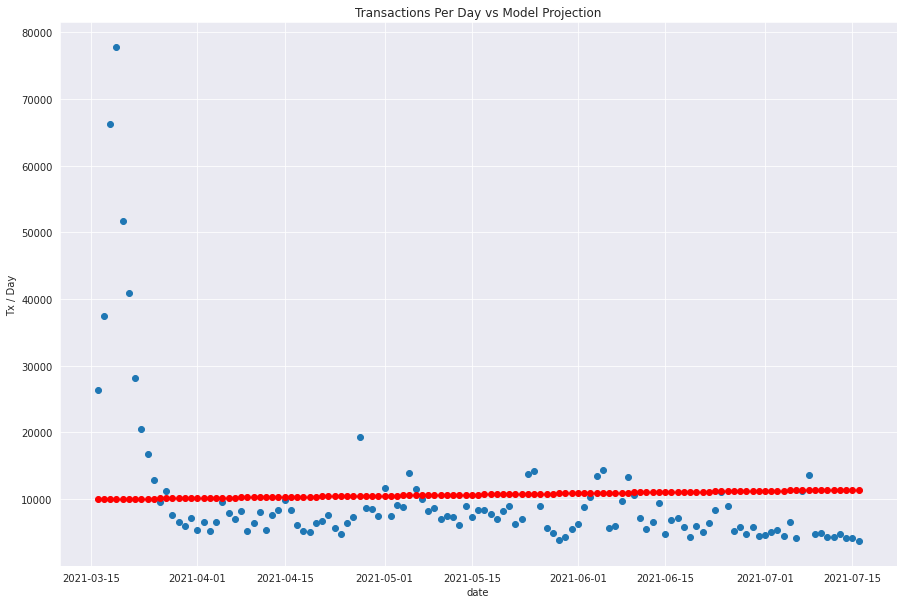

In [66]:
plt_data = header_df.resample('D')[['tx_count']].sum()
plt.scatter(plt_data.index, plt_data['tx_count'])
plt.scatter(plt_data.index, 10000 * np.cumprod(np.concatenate([np.ones(1),1.5 ** (1/365.25) * np.ones(len(plt_data)-1)])),c='red')
plt.title('Transactions Per Day vs Model Projection')
plt.ylabel('Tx / Day')
plt.xlabel('date')
plt.show()

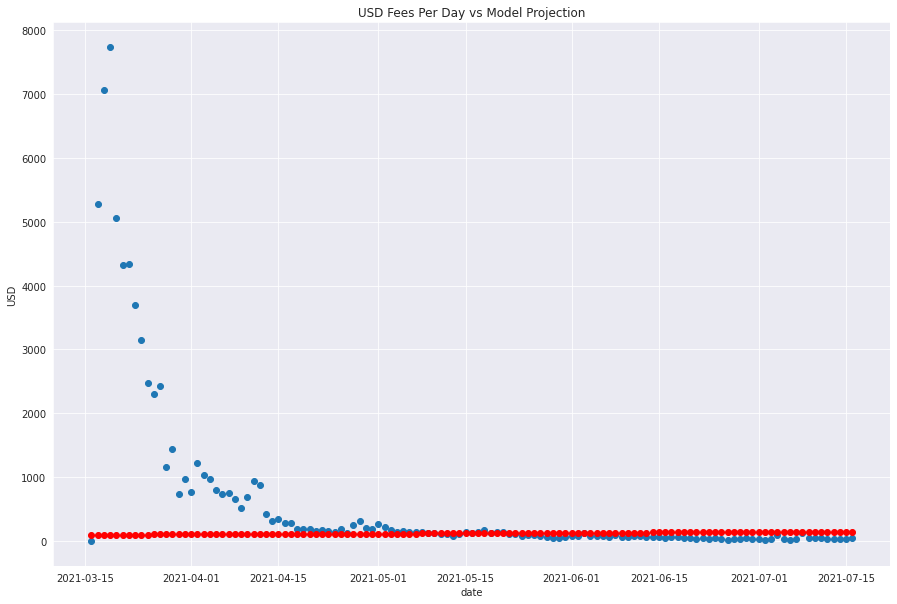

In [65]:
plt.scatter(daily_df.index, daily_df['total_fee'] * daily_df['price'] / 1000000)
model_daily_fees = 2500 * np.cumprod(np.concatenate([np.ones(1),1.5 ** (1/365.25) * np.ones(len(daily_df)-1)])) * 0.04 * np.cumprod(np.concatenate([np.ones(1),2.25 ** (1/365.25) * np.ones(len(daily_df)-1)]))
plt.scatter(daily_df.index, model_daily_fees,c='red')
plt.title('USD Fees Per Day vs Model Projection')
plt.ylabel('USD')
plt.xlabel('date')
plt.show()

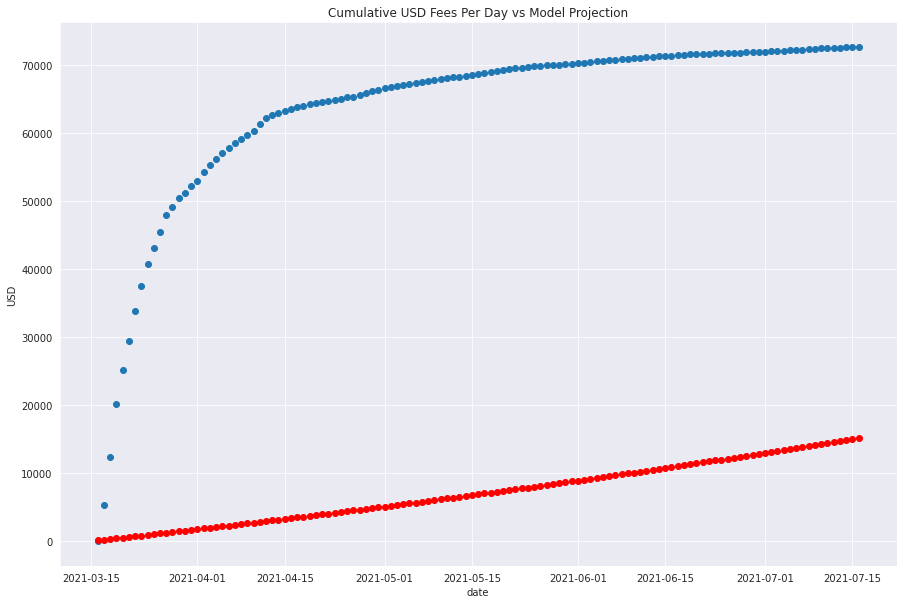

In [64]:
plt.scatter(daily_df.index, (daily_df['total_fee'] * daily_df['price'] / 1000000).cumsum())
model_daily_fees = 2500 * np.cumprod(np.concatenate([np.ones(1),1.5 ** (1/365.25) * np.ones(len(daily_df)-1)])) * 0.04 * np.cumprod(np.concatenate([np.ones(1),2.25 ** (1/365.25) * np.ones(len(daily_df)-1)]))
plt.scatter(daily_df.index, np.cumsum(model_daily_fees),c='red')
plt.title('Cumulative USD Fees Per Day vs Model Projection')
plt.ylabel('USD')
plt.xlabel('date')
plt.show()

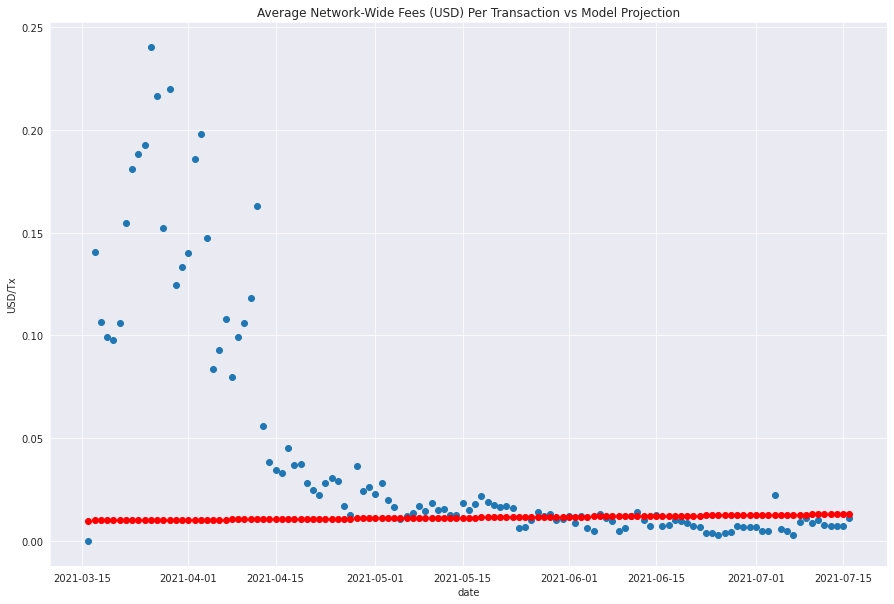

In [63]:
plt.scatter(daily_df.index, daily_df['price']*daily_df['total_fee']/(1000000*daily_df['tx_count']))
model_daily_fees = 0.01 * np.cumprod(np.concatenate([np.ones(1),2.25 ** (1/365.25) * np.ones(len(daily_df)-1)]))
plt.scatter(daily_df.index, model_daily_fees,c='red')
plt.title('Average Network-Wide Fees (USD) Per Transaction vs Model Projection')
plt.ylabel('USD/Tx')
plt.xlabel('date')
plt.show()

In [46]:
daily_del_df = header_df[header_df['delegated']].resample('D')[['total_fee','tx_count','inflation']].sum()
daily_del_df['price'] = (price_df['Close**'] + price_df['Open*']) / 2
daily_del_df.bfill(inplace=True)
daily_del_df = daily_del_df.dropna()

daily_undel_df = header_df[~header_df['delegated']].resample('D')[['total_fee','tx_count','inflation']].sum()
daily_undel_df['price'] = (price_df['Close**'] + price_df['Open*']) / 2
daily_undel_df.bfill(inplace=True)
daily_undel_df = daily_undel_df.dropna()

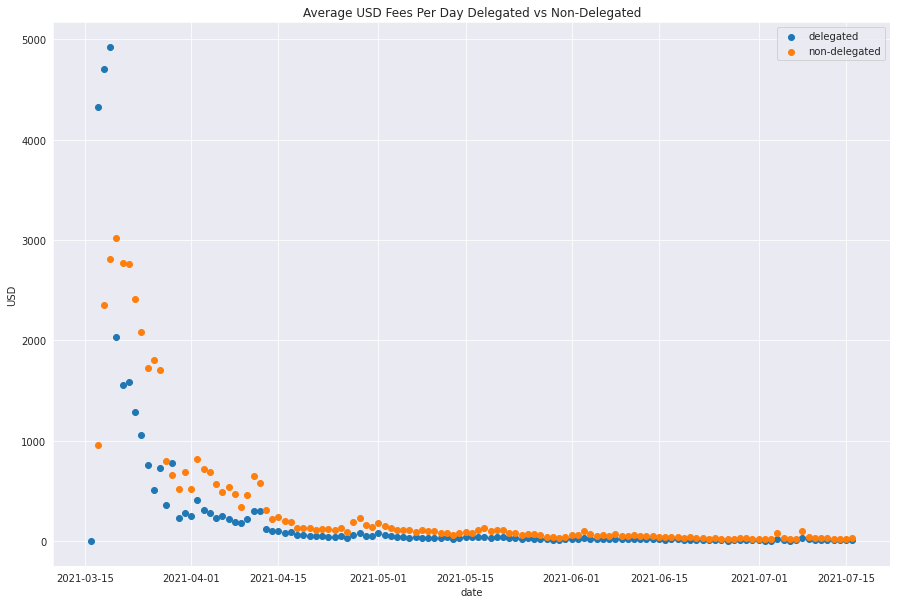

In [51]:
plt.scatter(daily_del_df.index, (daily_del_df['total_fee'] * daily_del_df['price'] / 1000000))
plt.scatter(daily_undel_df.index, (daily_undel_df['total_fee'] * daily_undel_df['price'] / 1000000))
plt.title('Average USD Fees Per Day Delegated vs Non-Delegated')
plt.legend(['delegated','non-delegated'])
plt.ylabel('USD')
plt.xlabel('date')
plt.show()

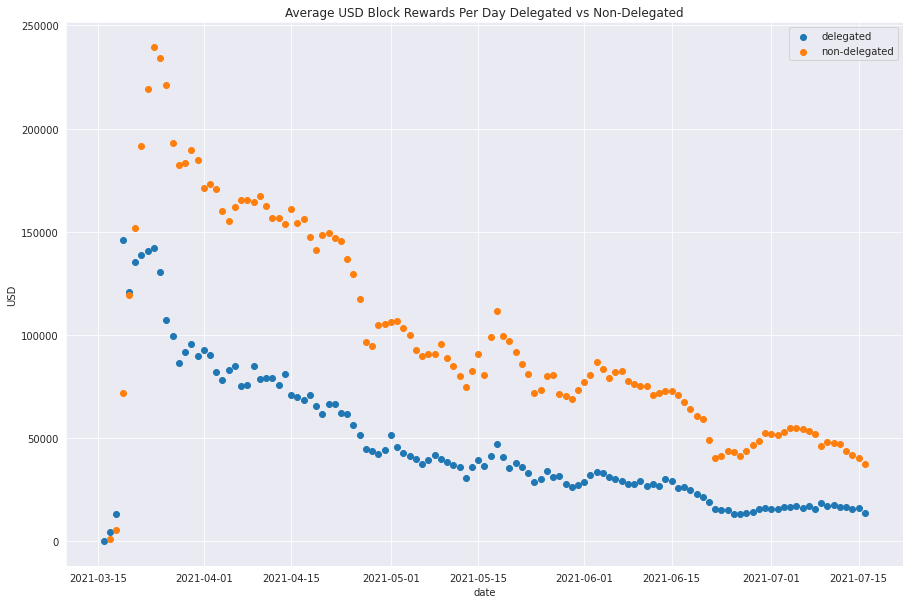

In [52]:
plt.scatter(daily_del_df.index, ((daily_del_df['total_fee']+daily_del_df['inflation']) * daily_del_df['price'] / 1000000))
plt.scatter(daily_undel_df.index, ((daily_undel_df['total_fee']+daily_undel_df['inflation']) * daily_undel_df['price'] / 1000000))
plt.title('Average USD Block Rewards Per Day Delegated vs Non-Delegated')
plt.legend(['delegated','non-delegated'])
plt.ylabel('USD')
plt.xlabel('date')
plt.show()

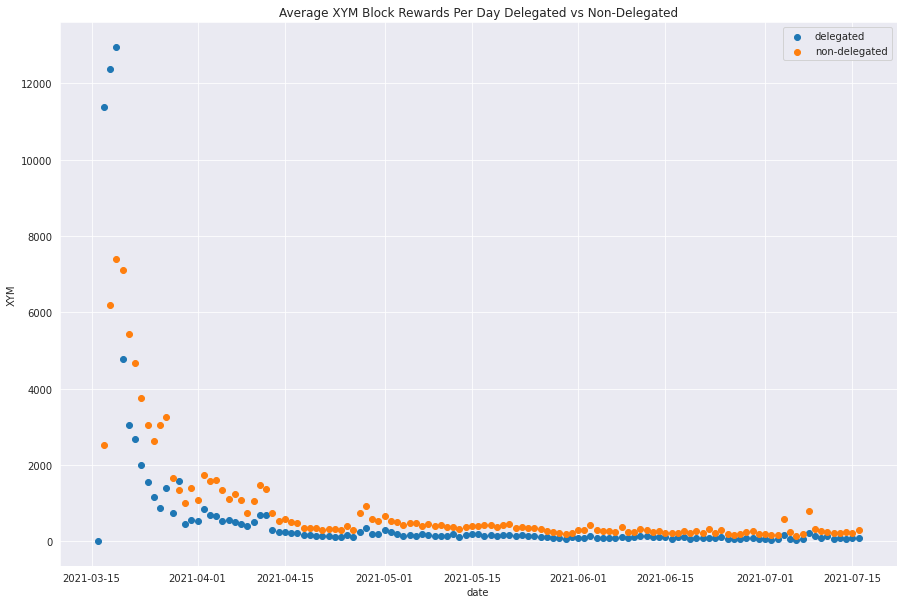

In [53]:
plt.scatter(daily_del_df.index, (daily_del_df['total_fee'] / 1000000))
plt.scatter(daily_undel_df.index, (daily_undel_df['total_fee'] / 1000000))
plt.title('Average XYM Block Rewards Per Day Delegated vs Non-Delegated')
plt.legend(['delegated','non-delegated'])
plt.ylabel('XYM')
plt.xlabel('date')
plt.show()

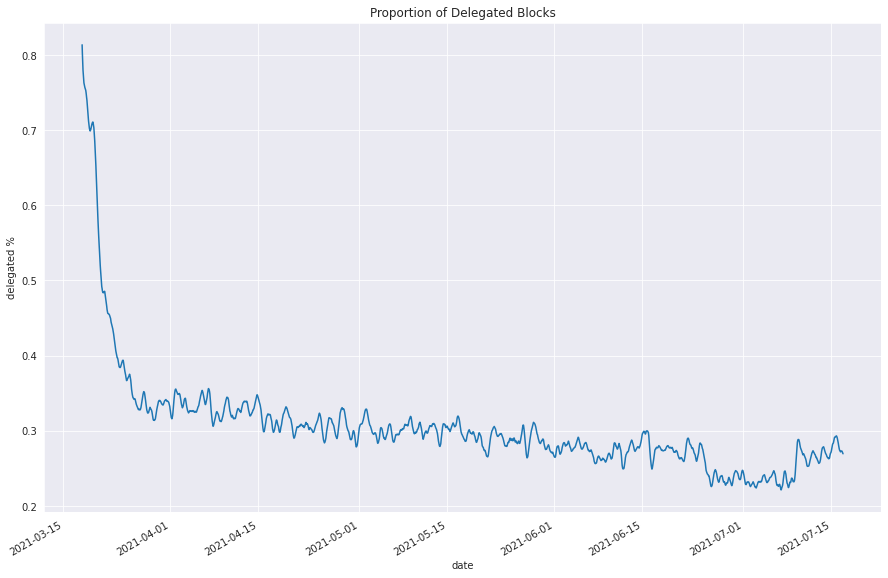

In [62]:
header_df['delegated'].astype(float).rolling(1440).mean().rolling(1440).mean().plot()
plt.title('Proportion of Delegated Blocks')
plt.ylabel('delegated %')
plt.xlabel('date')
plt.show()

In [38]:
from collections import defaultdict

# TODO: handle flows for *all* mosaics, not just XYM

account_map = defaultdict(lambda:{
    'xym_balance': defaultdict(lambda:0),
    'delegation_requests': defaultdict(lambda:[]),
    'vrf_key_link': defaultdict(lambda:[]),
    'node_key_link': defaultdict(lambda:[]),
    'account_key_link': defaultdict(lambda:[])
})


def analyze_tx(tx,height,fee_multiplier,account_map):
    address = public_key_to_address(unhexlify(tx['signer_public_key']))
    
    # transfer tx
    if tx['type'] == b'4154':
        if len(tx['payload']['message']) and tx['payload']['message'][0] == 0xfe:
            account_map[address]['delegation_requests'][tx['payload']['recipient_address']].append(height)
        elif tx['payload']['mosaics_count'] > 0:
            for mosaic in tx['payload']['mosaics']:
                if hex(mosaic['mosaic_id']) == '0x6bed913fa20223f8': # only care about XYM for now
                    account_map[address]['xym_balance'][height] -= mosaic['amount']
                    account_map[tx['payload']['recipient_address']]['xym_balance'][height] += mosaic['amount']
    
    # key link tx          
    elif tx['type'] in [b'4243',b'424c',b'414c']:
        if tx['type'] == b'4243': #vrf key link
            link_key = 'vrf_key_link'
        elif tx['type'] == b'424c': #node key link
            link_key = 'node_key_link'
        elif tx['type'] == b'414c': #account key link
            link_key = 'account_key_link'
        if tx['payload']['link_action'] == 1:
            account_map[address][link_key][public_key_to_address(tx['payload']['linked_public_key'])].append([height,np.inf])
        else:
            account_map[address][link_key][public_key_to_address(tx['payload']['linked_public_key'])][-1][1] = height
    
    # aggregate tx
    elif tx['type'] in [b'4141',b'4241']:
        for sub_tx in tx['payload']['embedded_transactions']:
            analyze_tx(sub_tx,height,None,account_map)
    
    # handle fees
    if fee_multiplier is not None:
        account_map[address]['xym_balance'][height] -= min(tx['max_fee'],tx['size']*fee_multiplier)
    
    
def analyze_rx(rx,height,account_map):
    
    # rental fee receipts
    if rx['type'] in [0x124D, 0x134E]: 
        if hex(rx['payload']['mosaic_id']) == '0x6bed913fa20223f8':
            account_map[rx['payload']['sender_address']]['xym_balance'][height] -= rx['payload']['amount']
            account_map[rx['payload']['recipient_address']]['xym_balance'][height] += rx['payload']['amount']
            
    # harvest fee receipts
    elif rx['type'] == 0x2143:
        account_map[rx['payload']['target_address']]['xym_balance'][height] += rx['payload']['amount']
    
    # aggregate receipts
    if rx['type'] == 0xE143:
        for sub_rx in rx['receipts']:
            analyze_rx(sub_rx,height,account_map)
        
    
for block in tqdm(blocks):
    height = block['header']['height']
    
    for tx in block['footer']['transactions']:
        analyze_tx(tx,height,block['header']['fee_multiplier'],account_map)
    
    for stmt in statements['transaction_statements'][height]:
        for rx in stmt['receipts']:
            analyze_rx(rx,height,account_map)
        

    

100%|██████████| 350776/350776 [00:27<00:00, 12990.91it/s]


In [39]:
[*account_map.items()][-5:]

[('NAWYHQW3UV4RJU5WY5TCUB2JMGRSQRDW6GT4TMI',
  {'xym_balance': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
               {350374: 99000000, 350592: 4899000012, 350597: 1}),
   'delegation_requests': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
               {}),
   'vrf_key_link': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
               {}),
   'node_key_link': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
               {}),
   'account_key_link': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
               {})}),
 ('NCXSDVYNUICBEDZDGRXBIWSD6NQ4VLUYYQ4A27A',
  {'xym_balance': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
               {350513: 227690000}),
   'delegation_requests': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
               {}),
   'vrf_key_link': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
               {}),
   'node_key_link':